# Partie 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, RidgeCV, LassoCV,LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.pipeline import Pipeline


In [2]:
df = pd.read_csv('dataframe-partie1_2.csv')
original_df =  pd.read_csv('data.csv')

In [3]:


bins = pd.IntervalIndex.from_tuples(
    [(min(df["Value"])-1, 300000), (300000,600000), (600000,2000000), (2000000, max(df["Value"])+1)])
df["DValue"] = pd.cut(df["Value"], bins)

bins = pd.IntervalIndex.from_tuples(
    [(min(df["Wage"])-1, 15000), (15000, 90000), (90000, max(df["Wage"])+1)])
df["DWage"] = pd.cut(df["Wage"], bins)


/home/akaen/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DValue', ylabel='count'>

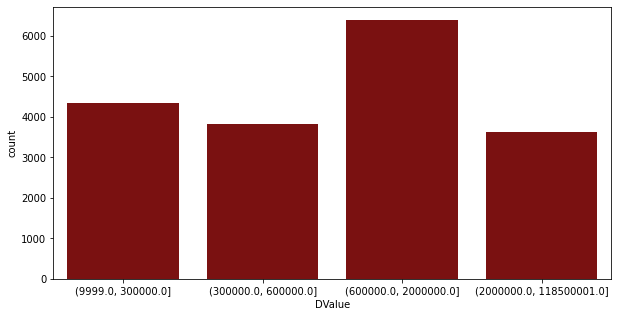

In [4]:
plt.figure(figsize=(10, 5))
sns.countplot(df["DValue"], color="darkred")


<AxesSubplot:xlabel='DWage', ylabel='count'>

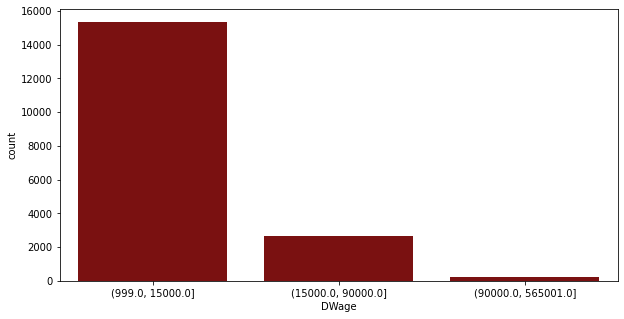

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(df["DWage"], color="darkred")


In [6]:
df_tmp = df[['Overall', 'Potential', 'Special', 'International Reputation', 'Weak Foot',
        'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
        'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
        'BallControl', 'Acceleration', 'Agility', 'Reactions', 'Balance',
        'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'LS', 'LDM',
        'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'BMI',
        'Composure', 'StandingTackle', 'GKDiving']].copy()

new_DF_DW = df_tmp
new_DF_DV = df_tmp

labels_dwage = df['DWage'].astype('category').cat.codes
labels_dvalue = df['DValue'].astype('category').cat.codes
age_categories = df['Age'].astype('category').cat.codes
position_categories = df['Position'].astype('category').cat.codes


In [7]:
new_DF_DW['Age'] = age_categories
new_DF_DW['Position'] = position_categories
new_DF_DW['Height'] = df['Height']
new_DF_DW['Weight'] = df['Weight']
new_DF_DW['BMI'] = df['BMI']
new_DF_DW['LS'] = df['LS']
new_DF_DW['LDM'] = df['LDM']
new_DF_DW['DValue'] = labels_dvalue
new_DF_DW['DWage'] = labels_dwage


new_DF_DW


,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,...,Vision,Penalties,BMI,Composure,StandingTackle,GKDiving,Age,Position,DValue,DWage
0,94,94,2202,5.0,4.0,4.0,1.7018,72.108844,84.0,95.0,...,94.0,75.0,24.898403,96.0,28.0,6.0,3,1,3,2
1,94,94,2228,5.0,4.0,5.0,1.8796,82.993197,84.0,94.0,...,82.0,85.0,23.491547,95.0,31.0,7.0,3,1,3,2
2,92,93,2143,5.0,5.0,5.0,1.7526,68.027211,79.0,87.0,...,87.0,81.0,22.147109,94.0,24.0,9.0,2,1,3,2
3,91,93,1471,4.0,3.0,1.0,1.9304,76.190476,17.0,13.0,...,68.0,40.0,20.445892,68.0,21.0,90.0,2,2,3,2
4,91,92,2281,4.0,5.0,4.0,1.8034,69.841270,93.0,82.0,...,94.0,79.0,21.474744,88.0,58.0,15.0,2,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,47,65,1307,1.0,2.0,2.0,1.7526,60.770975,34.0,38.0,...,52.0,43.0,19.784751,45.0,48.0,10.0,0,3,0,0
18203,47,63,1098,1.0,2.0,2.0,1.9050,77.097506,23.0,52.0,...,33.0,43.0,21.244688,42.0,15.0,10.0,0,1,0,0
18204,47,67,1189,1.0,3.0,2.0,1.7272,67.120181,25.0,40.0,...,43.0,55.0,22.499241,41.0,13.0,6.0,0,1,0,0
18205,47,66,1228,1.0,3.0,2.0,1.7780,69.841270,44.0,50.0,...,47.0,50.0,22.092691,46.0,25.0,14.0,0,1,0,0


In [8]:

new_DF_DV = new_DF_DW.drop('DValue', axis=1)
new_DF_DV = new_DF_DV.drop('DWage', axis=1)
new_DF_DV['DWage'] = labels_dwage
new_DF_DV['DValue'] = labels_dvalue

new_DF_DV


,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,...,Vision,Penalties,BMI,Composure,StandingTackle,GKDiving,Age,Position,DWage,DValue
0,94,94,2202,5.0,4.0,4.0,1.7018,72.108844,84.0,95.0,...,94.0,75.0,24.898403,96.0,28.0,6.0,3,1,2,3
1,94,94,2228,5.0,4.0,5.0,1.8796,82.993197,84.0,94.0,...,82.0,85.0,23.491547,95.0,31.0,7.0,3,1,2,3
2,92,93,2143,5.0,5.0,5.0,1.7526,68.027211,79.0,87.0,...,87.0,81.0,22.147109,94.0,24.0,9.0,2,1,2,3
3,91,93,1471,4.0,3.0,1.0,1.9304,76.190476,17.0,13.0,...,68.0,40.0,20.445892,68.0,21.0,90.0,2,2,2,3
4,91,92,2281,4.0,5.0,4.0,1.8034,69.841270,93.0,82.0,...,94.0,79.0,21.474744,88.0,58.0,15.0,2,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,47,65,1307,1.0,2.0,2.0,1.7526,60.770975,34.0,38.0,...,52.0,43.0,19.784751,45.0,48.0,10.0,0,3,0,0
18203,47,63,1098,1.0,2.0,2.0,1.9050,77.097506,23.0,52.0,...,33.0,43.0,21.244688,42.0,15.0,10.0,0,1,0,0
18204,47,67,1189,1.0,3.0,2.0,1.7272,67.120181,25.0,40.0,...,43.0,55.0,22.499241,41.0,13.0,6.0,0,1,0,0
18205,47,66,1228,1.0,3.0,2.0,1.7780,69.841270,44.0,50.0,...,47.0,50.0,22.092691,46.0,25.0,14.0,0,1,0,0


In [9]:
def fill_na_values(df):
    for col in df.columns:
        median = df[col].median()
        df[col] = df[col].fillna(median)
    return df

In [10]:
new_DF_DW = fill_na_values(new_DF_DW)
new_DF_DV = fill_na_values(new_DF_DV)


In [11]:
X_DWage = new_DF_DW.drop(['DWage'], axis=1)
X_DValue = new_DF_DV.drop(['DValue'], axis=1)


In [12]:
X_DW_train, X_DW_test, y_DW_train, y_DW_test = train_test_split(
    X_DWage, labels_dwage, test_size=0.33, random_state=42)
X_DV_train, X_DV_test, y_DV_train, y_DV_test = train_test_split(
    X_DValue, labels_dvalue, test_size=0.33, random_state=42)


In [13]:
labels_dwage

0        2
1        2
2        2
3        2
4        2
        ..
18202    0
18203    0
18204    0
18205    0
18206    0
Length: 18207, dtype: int8

In [14]:
def scores(y_true,y_pred):
        report = classification_report(y_true, y_pred)
        print(report)
        #df = pd.DataFrame(report)
        #latex = df.to_latex(index=False)
        #print(latex)

/home/akaen/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/akaen/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/akaen/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/akaen/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


accuracy KNeighborsClassifier() DWage 0.8904975869529039 
accuracy KNeighborsClassifier() DValue 0.6442003661174904
KNeighborsClassifier() DWage classification report : 


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5094
           1       0.64      0.51      0.57       843
           2       0.68      0.24      0.35        72

    accuracy                           0.89      6009
   macro avg       0.75      0.57      0.62      6009
weighted avg       0.88      0.89      0.88      6009

KNeighborsClassifier() DValue classification report : 

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1424
           1       0.50      0.58      0.54      1262
           2       0.64      0.64      0.64      2137
           3       0.69      0.61      0.65      1186

    accuracy                           0.64      6009
   macro avg       0.65      0.64      0.64      6009
weighted av

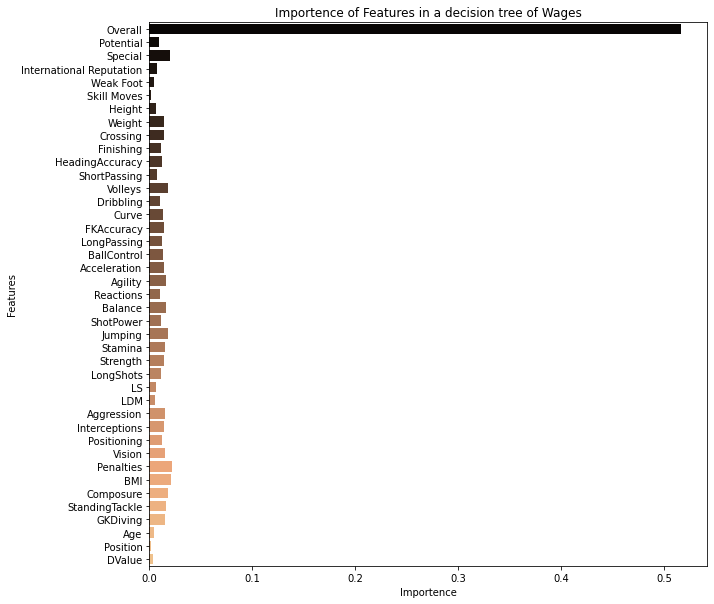

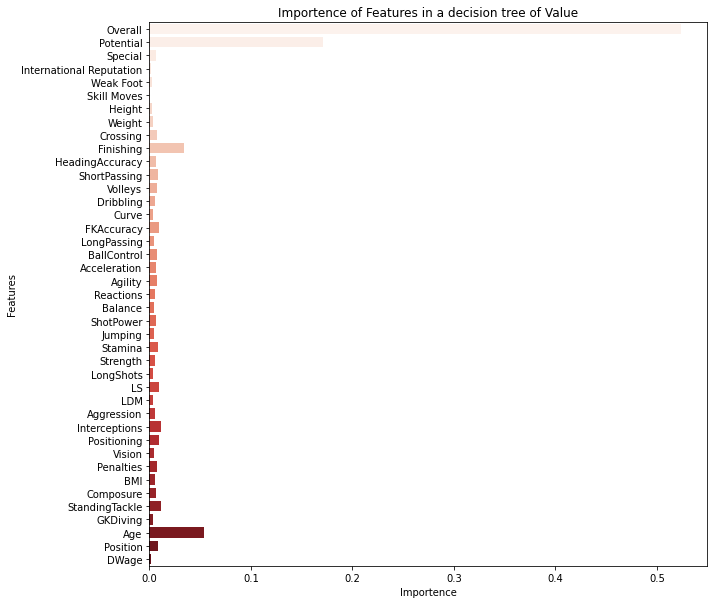

/home/akaen/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy LogisticRegression(multi_class='multinomial') DWage 0.8705275420203029 
accuracy LogisticRegression(multi_class='multinomial') DValue 0.545015809618905
LogisticRegression(multi_class='multinomial') DWage classification report : 


              precision    recall  f1-score   support

           0       0.90      0.97      0.93      5094
           1       0.56      0.36      0.44       843
           2       0.00      0.00      0.00        72

    accuracy                           0.87      6009
   macro avg       0.49      0.44      0.46      6009
weighted avg       0.84      0.87      0.85      6009

LogisticRegression(multi_class='multinomial') DValue classification report : 

              precision    recall  f1-score   support

           0       0.63      0.69      0.66      1424
           1       0.39      0.17      0.24      1262
           2       0.51      0.69      0.58      2137
           3       0.61      0.52      0.56      1186

    accuracy                

/home/akaen/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/akaen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/akaen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier

df_ = pd.read_csv('data.csv')


def classifier_accuracy(m, plot=False):

    try:
        clf = m(multi_class='multinomial',).fit(X_DW_train, y_DW_train)
        clf_ = m(multi_class='multinomial').fit(X_DV_train, y_DV_train)
    except:
        clf = m().fit(X_DW_train, y_DW_train)
        clf_ = m().fit(X_DV_train, y_DV_train)

    try:
        
        prefictions = clf.predict(X_DW_test)
        prefictions_ = clf_.predict(X_DV_test)

        res = clf.score(X_DW_test, y_DW_test)
        res_ = clf_.score(X_DV_test, y_DV_test)
        print('accuracy '+str(clf)+' DWage', res,
              '\naccuracy '+str(clf)+' DValue', res_)
        
        print(str(clf)+' DWage classification report : \n')
        print()
        scores(y_DW_test,prefictions)

        print(str(clf)+' DValue classification report : \n')
        scores(y_DV_test,prefictions_)

        

    except:
        res = clf.score(X_DW_test, y_DW_test)
        res_ = clf_.score(X_DV_test, y_DV_test)
        print('accuracy '+str(clf)+' DWage', res,
              '\naccuracy '+str(clf)+' DValue', res_)

    if plot == True and m == DecisionTreeClassifier:
        plt.figure(figsize=(10, 10))
        sns.barplot(y=clf.feature_names_in_,
                    x=clf.feature_importances_, palette='copper')
        plt.xlabel('Importence')
        plt.ylabel('Features')
        plt.title('Importence of Features in a decision tree of Wages')
        plt.show()
        
        plt.figure(figsize=(10, 10))
        sns.barplot(y=clf_.feature_names_in_,
                    x=clf_.feature_importances_, palette='Reds')
        plt.xlabel('Importence')
        plt.ylabel('Features')
        plt.title('Importence of Features in a decision tree of Value')
        plt.show()



clfs = [KNeighborsClassifier, DecisionTreeClassifier,LogisticRegression,GaussianNB]
for clf in clfs:
    classifier_accuracy(clf, True)


On the returned scores we are going to focus on the weighted results, because, it says the function to compute f1 for each label, and returns the average considering the **proportion for each label in the dataset**.

We can see that `Overall` is importent for both `Value` and `Wage`.

`Potential, Age` and `finishing` are also stands out for `Value`.

##  Regression Part

Selecting all numerical or categorical features that we are going to work with

In [16]:


X = df[['Overall', 'Wage', 'Potential', 'Special', 'International Reputation', 'Weak Foot',
        'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
        'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
        'BallControl', 'Acceleration', 'Agility', 'Reactions', 'Balance',
        'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'LS', 'LDM',
        'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'BMI',
        'Composure', 'StandingTackle', 'GKDiving']].copy()


In [17]:
X = fill_na_values(X)
X['Age'] = original_df['Age']

In [18]:
yvalue = df['Value'].values 
yvalue[:5]

array([1.105e+08, 7.700e+07, 1.185e+08, 7.200e+07, 1.020e+08])

In [19]:
X_norm_value = MinMaxScaler().fit_transform(X)

sel_ = SelectFromModel(Ridge())
sel_.fit(X_norm_value, yvalue)

SelectFromModel(estimator=Ridge())

Looking at the coefficient plot to gauge feature importance can be misleading as some of them vary on a small scale, while others not.

Multiplying the coefficients by the standard deviation of the related feature would reduce all the coefficients to the same unit of measure.

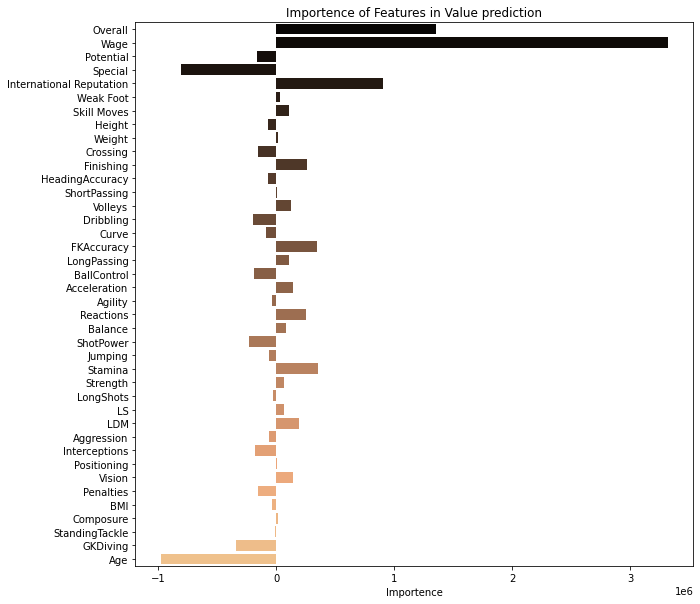

In [20]:
importences_value = sel_.estimator_.coef_
plt.figure(figsize=(10, 10))
sns.barplot(y=X.columns,
            x=importences_value * X_norm_value.std(axis=0), palette='copper')
plt.xlabel('Importence')
plt.title('Importence of Features in Value prediction')
plt.show()

In [21]:
selected_feat = X.columns[(sel_.get_support())]

print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))


total features: 40
selected features: 5
features with coefficients shrank to zero: 0


Let's see what features has been selected

In [22]:
selected_feat


Index(['Overall', 'Wage', 'Special', 'International Reputation', 'Age'], dtype='object')

In [23]:
X_model_value = X[selected_feat]
X_model_value.shape


(18207, 5)

In [24]:
X_train_value, X_test_value, y_train_value, y_test_value = train_test_split(
    X_model_value, yvalue, test_size=0.33,random_state= 42)


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score


for r_m in [LassoCV,LinearRegression, Ridge]:
    model = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("poly", PolynomialFeatures()),
        ("lin_reg", r_m())
    ))


    model.fit(X_train_value, y_train_value)
    y_test_pred = model.predict(X_test_value)
    print('='*50)
    print(r_m)
    print('r2_score : ',r2_score(y_test_value, y_test_pred))



<class 'sklearn.linear_model._coordinate_descent.LassoCV'>
r2_score :  0.9100516725962828
<class 'sklearn.linear_model._base.LinearRegression'>
r2_score :  0.9114466921405845
<class 'sklearn.linear_model._ridge.Ridge'>
r2_score :  0.9114572075302693


## French Players Value:

In [26]:
df_francais = df[df['Nationality'] == 'France']
X_francais = X.iloc[df_francais.index]
X_francais.shape


(914, 40)

In [27]:
y = df['Value'].iloc[X_francais.index].values
y.shape

(914,)

In [28]:

X_norm = MinMaxScaler().fit_transform(X_francais)

sel_ = SelectFromModel(Ridge())
sel_.fit(X_norm, y)


SelectFromModel(estimator=Ridge())

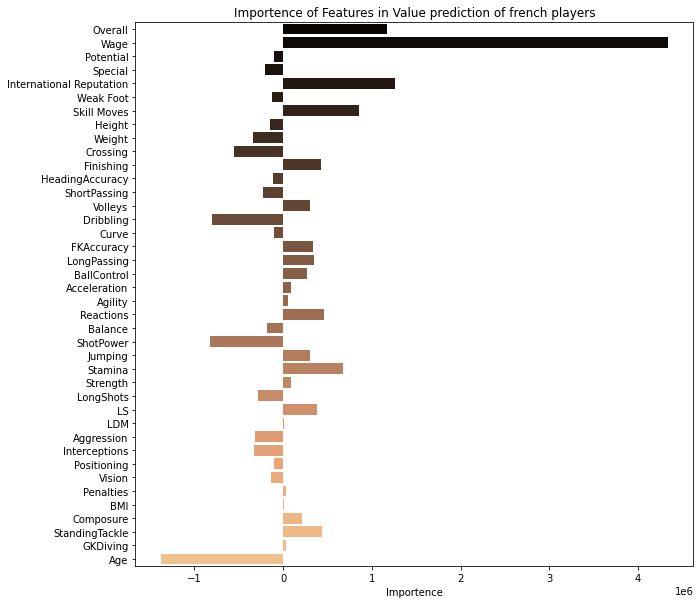

In [29]:
importences_value = sel_.estimator_.coef_
plt.figure(figsize=(10, 10))
sns.barplot(y=X_francais.columns,
            x=importences_value * X_norm.std(axis=0), palette='copper')
plt.xlabel('Importence')
plt.title('Importence of Features in Value prediction of french players')
plt.show()

In [30]:
selected_feat = X.columns[(sel_.get_support())]

print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))


total features: 40
selected features: 9
features with coefficients shrank to zero: 0


In [31]:
selected_feat


Index(['Overall', 'Wage', 'International Reputation', 'Skill Moves',
       'Dribbling', 'Reactions', 'ShotPower', 'Stamina', 'Age'],
      dtype='object')

### Remarque: 
The importence of features based on weights are different if we select only french players.

Some other features joined the initial selection.

# Predicting Overall

In [32]:
yoverall = df['Overall'].values 
yoverall[:5]

array([94, 94, 92, 91, 91])

In [33]:
X_overall = X.copy()
X_overall = X_overall.drop('Overall',axis=1)
X_overall['Value'] = df['Value']


In [34]:
X_norm_overall = MinMaxScaler().fit_transform(X_overall)

sel_ = SelectFromModel(Ridge())
sel_.fit(X_norm_overall, yoverall)

SelectFromModel(estimator=Ridge())

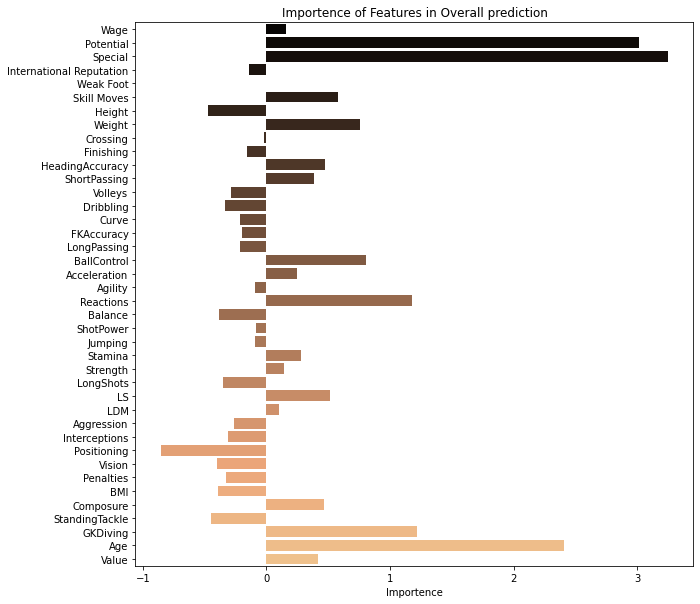

In [35]:
importences_value = sel_.estimator_.coef_
plt.figure(figsize=(10, 10))
sns.barplot(y=X_overall.columns,
            x=importences_value * X_norm_overall.std(axis=0), palette='copper')
plt.xlabel('Importence')
plt.title('Importence of Features in Overall prediction')
plt.show()

In [36]:
selected_feat = X_overall.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_overall.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 40
selected features: 12
features with coefficients shrank to zero: 0


In [37]:
selected_feat

Index(['Wage', 'Potential', 'Special', 'Weight', 'BallControl', 'Reactions',
       'Positioning', 'BMI', 'Composure', 'GKDiving', 'Age', 'Value'],
      dtype='object')

In [38]:
X_model_overall = X_overall[selected_feat]
X_train, X_test, y_train, y_test = train_test_split(
    X_model_overall, yoverall, test_size=.2, random_state=42)
X_model_overall.shape

(18207, 12)

In [39]:
for r_m in [Lasso,LinearRegression, Ridge]:
    model = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", r_m())
    ))

    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    print('='*50)
    print(r_m)
    print('r2_score : ',r2_score(y_test, y_test_pred))

<class 'sklearn.linear_model._coordinate_descent.Lasso'>
r2_score :  0.8358379006487198
<class 'sklearn.linear_model._base.LinearRegression'>
r2_score :  0.9174712978409312
<class 'sklearn.linear_model._ridge.Ridge'>
r2_score :  0.9174709111155189


We can see that we have good results using `LR` or `Ridge`, because, in our features we still have `Potential`, which is a little similar to our target `Overall`.

If we remove the `PolynomialFeatures`, the results are also prety good with r2 = 0.91

# Predicting Wage

In [40]:
X_wage = X.copy()
X_wage['Value'] = df['Value']
X_wage = X_wage.drop('Wage', axis=1)
y = df['Wage'].values
y[:5]


array([565000., 405000., 290000., 260000., 355000.])

In [41]:
X_norm_wage = MinMaxScaler().fit_transform(X_wage)

sel_ = SelectFromModel(Ridge())
sel_.fit(X_norm_wage, y)


SelectFromModel(estimator=Ridge())

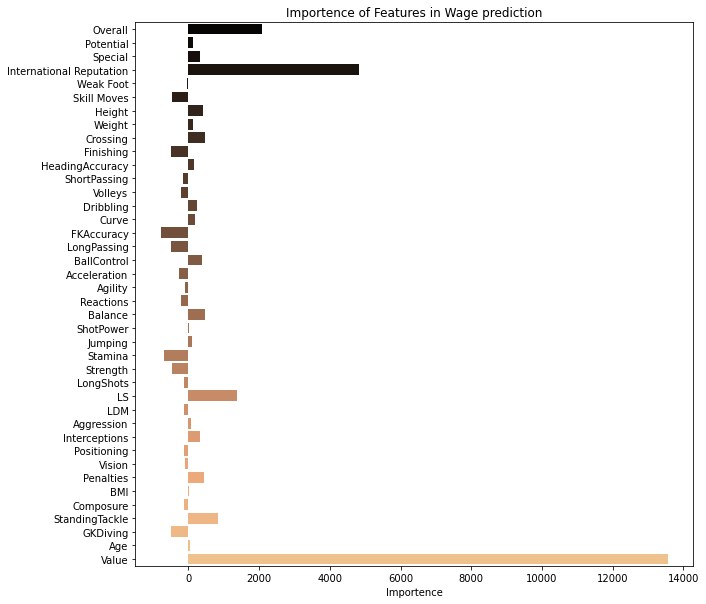

In [42]:
importences_value = sel_.estimator_.coef_
plt.figure(figsize=(10, 10))
sns.barplot(y=X_wage.columns,
            x=importences_value * X_norm_wage.std(axis=0), palette='copper')
plt.xlabel('Importence')
plt.title('Importence of Features in Wage prediction')
plt.show()

In [43]:
selected_feat = X_wage.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_wage.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))


total features: 40
selected features: 3
features with coefficients shrank to zero: 0


In [44]:
selected_feat


Index(['Overall', 'International Reputation', 'Value'], dtype='object')

In [45]:
X_model = X_wage[selected_feat]
X_train, X_test, y_train, y_test = train_test_split(
    X_model, y, test_size=.2, random_state=42)
X_model.shape

(18207, 3)

In [46]:


results = {}
for r_m in [Lasso,LinearRegression, Ridge]:
    model = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("poly", PolynomialFeatures()),
        ("lin_reg", r_m())
    ))

    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    print('='*50)
    print(r_m)
    print('r2_score : ',r2_score(y_test, y_test_pred))

<class 'sklearn.linear_model._coordinate_descent.Lasso'>
r2_score :  0.8135645457987263
<class 'sklearn.linear_model._base.LinearRegression'>
r2_score :  0.8136072623887647
<class 'sklearn.linear_model._ridge.Ridge'>
r2_score :  0.8135905767523653


We can try to plot our predictions, so we can visualize with real values

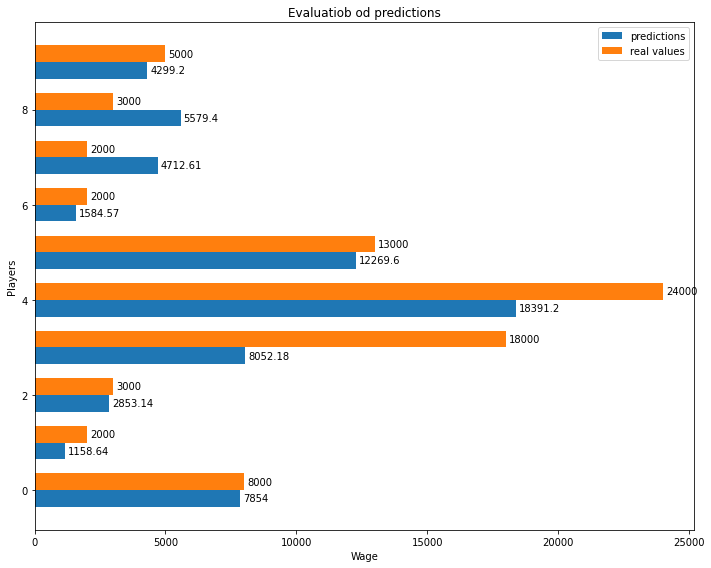

In [47]:

x = np.arange(10)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, y_test_pred.reshape(1, -
                 1).tolist()[0][:10], width, label='predictions')
rects2 = ax.barh(x + width/2, y_test.reshape(1, -
                 1).tolist()[0][:10], width, label='real values')


ax.set_ylabel('Players')
ax.set_xlabel('Wage')

ax.set_title('Evaluatiob od predictions')
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.set_size_inches(10, 8)
fig.tight_layout()

plt.show()
